In [1]:
pip install torch torchvision matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import subprocess
import os

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataloader = torch.utils.data.DataLoader(
    torchvision.datasets.FashionMNIST(
        root='./data', train=True, download=True, transform=transform
    ),
    batch_size=128, shuffle=True
)

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 128, 7, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 1, 7, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.main(x).view(-1)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netG = Generator().to(device)
netD = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizerD = torch.optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = torch.optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Hyperparameters
epochs = 20
batch_size = 128
z = 100
lr = 0.0002

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Epoch [1/20], D Loss: 0.5546, G Loss: 2.4827
Epoch [2/20], D Loss: 0.9080, G Loss: 1.3622
Epoch [3/20], D Loss: 0.9604, G Loss: 1.1688
Epoch [4/20], D Loss: 1.1511, G Loss: 0.6571
Epoch [5/20], D Loss: 1.0797, G Loss: 0.8536


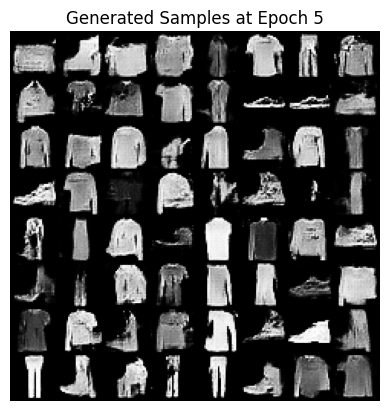

Generating fake images for FID at epoch 5...
1040 fake images saved.
Epoch 5 FID raw output:

Epoch 5 FID error output:
Traceback (most recent call last):
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 257, in calc

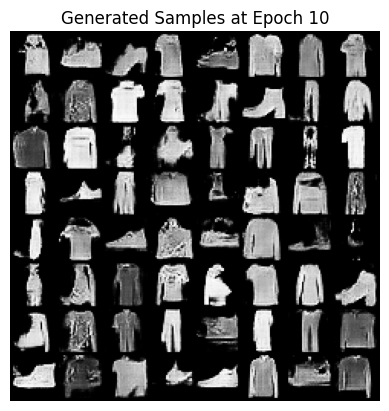

Generating fake images for FID at epoch 10...
1040 fake images saved.
Epoch 10 FID raw output:

Epoch 10 FID error output:
Traceback (most recent call last):
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 257, in c

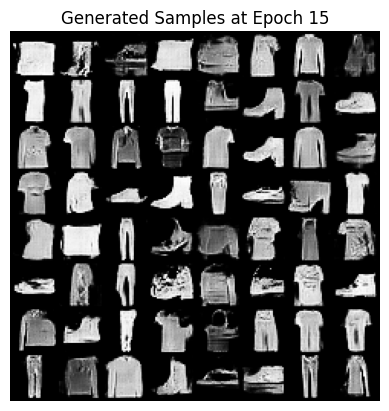

Generating fake images for FID at epoch 15...
1040 fake images saved.
Epoch 15 FID raw output:

Epoch 15 FID error output:
Traceback (most recent call last):
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 257, in c

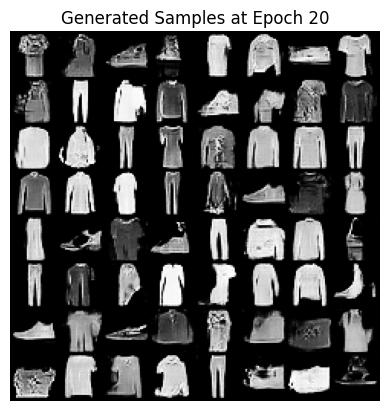

Generating fake images for FID at epoch 20...
1040 fake images saved.
Epoch 20 FID raw output:

Epoch 20 FID error output:
Traceback (most recent call last):
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 257, in c

In [7]:
import os
import torch
import subprocess
import matplotlib.pyplot as plt
from torchvision.utils import save_image, make_grid

# Function to save real images for FID
def save_real_images_for_fid(dataloader, save_dir="fid_images/real", max_images=1000):
    os.makedirs(save_dir, exist_ok=True)
    if len(os.listdir(save_dir)) >= max_images:
        #print("Real images already exist — skipping.")
        return

    real_image_count = 0
    print("Saving real images for FID reference...")
    for real_images, _ in dataloader:
        for img in real_images:
            save_image(img, f"{save_dir}/real_{real_image_count}.png", normalize=True)
            real_image_count += 1
            if real_image_count >= max_images:
                break
        if real_image_count >= max_images:
            break
    print(f"Saved {real_image_count} real images for FID.")


# Create directories
os.makedirs("fid_images/real", exist_ok=True)
os.makedirs("fid_images/fake", exist_ok=True)

# Save real images only once (for FID reference)
real_dir = "fid_images/real"
if len(os.listdir(real_dir)) < 1000:
    print("Saving real images for FID reference...")
    real_image_count = 0
    for real_images, _ in dataloader:
        for img in real_images:
            save_image(img, f"{real_dir}/real_{real_image_count}.png", normalize=True)
            real_image_count += 1
            if real_image_count >= 1000:
                break
        if real_image_count >= 1000:
            break
    print(f"Saved {real_image_count} real images.")

fid_scores = []
g_losses = []
d_losses = []

# Training loop
for epoch in range(20):
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)
        save_real_images_for_fid(dataloader)

        real_labels = torch.ones(batch_size).to(device)
        fake_labels = torch.zeros(batch_size).to(device)

        # Train Discriminator
        netD.zero_grad()
        outputs = netD(real_images)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = netG(z)
        outputs = netD(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        z = torch.randn(batch_size, 100, 1, 1).to(device)
        fake_images = netG(z)
        outputs = netD(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_loss.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/20], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
    g_losses.append((epoch + 1, g_loss.item()))
    d_losses.append((epoch + 1, d_loss.item()))


    # Every 5 epochs: generate images and compute FID
    if (epoch + 1) % 5 == 0:
        netG.eval()

        # Show sample grid
        z = torch.randn(64, 100, 1, 1).to(device)
        fake_images = netG(z)
        grid = make_grid(fake_images[:64], nrow=8, normalize=True)
        plt.imshow(grid.permute(1, 2, 0).cpu())
        plt.axis("off")
        plt.title(f"Generated Samples at Epoch {epoch+1}")
        plt.show()

        # Clear old fake images
        fake_dir = "fid_images/fake"
        for f in os.listdir(fake_dir):
            os.remove(os.path.join(fake_dir, f))

        # Generate 1000 fake images
        print(f"Generating fake images for FID at epoch {epoch+1}...")
        num_generated = 0
        num_generated = 0
        netG.eval()
        with torch.no_grad():
            while num_generated < 1000:
                z = torch.randn(min(64, 1000 - num_generated), 100, 1, 1).to(device)
                fake_batch = netG(z)
                for img in fake_batch:
                    save_image(img, f"{fake_dir}/fake_{num_generated}.png", normalize=True)
                    num_generated += 1

        for idx, img in enumerate(fake_batch):
            save_image(img, f"{fake_dir}/fake_{idx}.png", normalize=True)
            num_generated += 1
        print(f"{num_generated} fake images saved.")

        # Verify enough images exist before FID calculation
        if len(os.listdir(real_dir)) >= 50 and len(os.listdir(fake_dir)) >= 50:
            try:
                fid_device = "cuda" if torch.cuda.is_available() else "cpu"
                result = subprocess.run(
                    ["python", "-m", "pytorch_fid", real_dir, fake_dir, "--device", fid_device],
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE,
                    text=True
                )

                # Debug print raw FID output
                print(f"Epoch {epoch+1} FID raw output:\n{result.stdout}")
                print(f"Epoch {epoch+1} FID error output:\n{result.stderr}")

                # Extract numeric FID
                fid_output = result.stdout.strip().split()
                fid_value = float(fid_output[-1])
                fid_scores.append((epoch + 1, fid_value))
                print(f"Epoch {epoch+1} FID Score: {fid_value:.2f}")

            except Exception as e:
                print(f"FID calculation failed at epoch {epoch+1}: {e}")
        else:
            print(f"Not enough images for FID at epoch {epoch+1} — skipping.")

        netG.train()

# Plotting FID scores
if fid_scores:
    epochs, scores = zip(*fid_scores)
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('FID Score')
    plt.title('FID Score vs Training Epochs')
    plt.grid(True)
    plt.show()
else:
    print("No valid FID scores were recorded.")


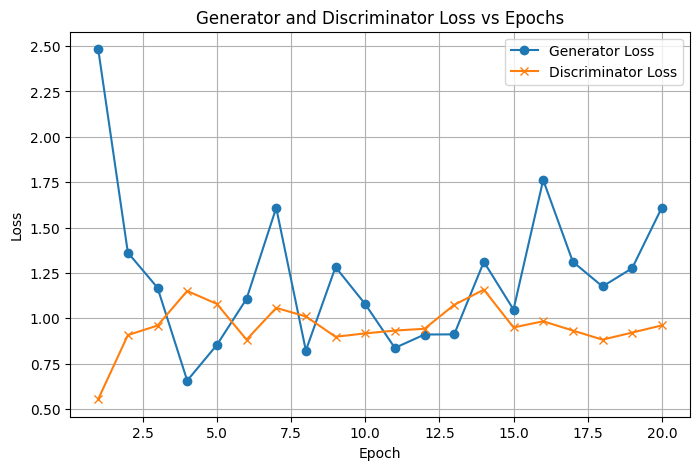

Lowest Generator Loss: 0.6571 at Epoch 4
Lowest Discriminator Loss: 0.5546 at Epoch 1


In [9]:
# Plot Losses vs Epochs
epochs_g, losses_g = zip(*g_losses)
epochs_d, losses_d = zip(*d_losses)

plt.figure(figsize=(8, 5))
plt.plot(epochs_g, losses_g, label="Generator Loss", marker='o')
plt.plot(epochs_d, losses_d, label="Discriminator Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Generator and Discriminator Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# Minimum G Loss
min_g_epoch = epochs_g[losses_g.index(min(losses_g))]
print(f"Lowest Generator Loss: {min(losses_g):.4f} at Epoch {min_g_epoch}")

# Minimum D Loss
min_d_epoch = epochs_d[losses_d.index(min(losses_d))]
print(f"Lowest Discriminator Loss: {min(losses_d):.4f} at Epoch {min_d_epoch}")


In [10]:
# Find epoch with minimum generator loss
best_epoch_index = losses_g.index(min(losses_g))
best_epoch = epochs_g[best_epoch_index]
print(f"Lowest Generator Loss: {losses_g[best_epoch_index]:.4f} at Epoch {best_epoch}")

# Generate fake images from best model (if you saved checkpoints per epoch)
# For now, assuming current netG is the best — optional: load from checkpoint

# Clear and recreate fake dir
fake_dir = "fid_images/fake"
for f in os.listdir(fake_dir):
    file_path = os.path.join(fake_dir, f)
    if os.path.isfile(file_path):
        os.remove(file_path)

# Generate 1000 fake images for FID
netG.eval()
num_generated = 0
with torch.no_grad():
    while num_generated < 1000:
        z = torch.randn(min(64, 1000 - num_generated), 100, 1, 1).to(device)
        fake_batch = netG(z)
        for img in fake_batch:
            save_image(img, f"{fake_dir}/fake_{num_generated}.png", normalize=True)
            num_generated += 1
print(f"{num_generated} fake images generated for FID.")

# Run FID calculation
real_dir = "fid_images/real"
if len(os.listdir(real_dir)) >= 50 and len(os.listdir(fake_dir)) >= 50:
    try:
        fid_device = "cpu"
        result = subprocess.run(
            ["python", "-m", "pytorch_fid", real_dir, fake_dir, "--device", fid_device],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )

        print("FID Calculation Output:")
        print(result.stdout)
        print("FID Error (if any):")
        print(result.stderr)

        fid_output = result.stdout.strip().split()
        fid_value = float(fid_output[-1])
        print(f"FID Score for Best Epoch ({best_epoch}): {fid_value:.2f}")

    except Exception as e:
        print(f"FID calculation failed at best epoch {best_epoch}: {e}")
else:
    print("Not enough images for FID — check image directories.")


Lowest Generator Loss: 0.6571 at Epoch 4
1000 fake images generated for FID.
FID Calculation Output:

FID Error (if any):
Traceback (most recent call last):
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/__main__.py", line 3, in <module>
    pytorch_fid.fid_score.main()
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 313, in main
    fid_value = calculate_fid_given_paths(args.path,
  File "/projectnb/ds340/students/leilanih/.conda/envs/GAN_project_env/lib/python3.10/site-packages/pytorch_fid/fid_score.py", line 259, in ca

In [12]:
python fid_score.py --true /projectnb/ds340/projects/leilani_hannah_final_project/fid_images/real_images_fid.npy --fake /projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake_images_fid.npy --gpu 0
/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/real
/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake


ModuleNotFoundError: No module named 'fid_score'

In [14]:
os.environ['CUDA_VISIBLE_DEVICES']

'0'

In [13]:
!nvidia-smi

Thu Apr 24 13:34:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-12GB           On  |   00000000:02:00.0 Off |                    0 |
| N/A   35C    P0             25W /  250W |       0MiB /  12288MiB |      0%   E. Process |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [19]:
import os
import numpy as np
from PIL import Image

def load_images_for_fid(image_dir, output_path, num_images=1000, target_size=(299, 299)):
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])
    image_files = image_files[:num_images]

    height, width = target_size
    data = np.zeros((len(image_files), 3, height, width), dtype=np.float32)

    for i, file_name in enumerate(image_files):
        img_path = os.path.join(image_dir, file_name)
        img = Image.open(img_path).convert('RGB').resize((width, height))

        # Convert to float32 and normalize to [0, 1]
        img_array = np.array(img).astype(np.float32) / 255.0

        # Convert to channels-first format
        img_array = np.transpose(img_array, (2, 0, 1))

        data[i] = img_array

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.save(output_path, data)
    print(f"Saved {len(image_files)} FID-ready images to {output_path}")


# === Load FAKE images ===
fake_dir = "/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake"
fake_output = "/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake_images_fid.npy"
load_images_for_fid(fake_dir, fake_output)

# === Load REAL images ===
real_dir = "/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/real"
real_output = "/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/real_images_fid.npy"
load_images_for_fid(real_dir, real_output)


Saved 1000 FID-ready images to /projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake_images_fid.npy
Saved 1000 FID-ready images to /projectnb/ds340/projects/leilani_hannah_final_project/fid_images/real_images_fid.npy


In [21]:
X = np.load("/projectnb/ds340/projects/leilani_hannah_final_project/fid_images/fake_images_fid.npy")
X.shape

(1000, 3, 299, 299)